In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import dowhy
from dowhy import gcm

import matplotlib.pyplot as plt

C:\Users\aleks\anaconda3\envs\causal_book_py38_dw09\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dowhy.__version__

'0.9'

# Encoding expert knowledge in causal discovery

A part of [CausalPython](https://causalpython.io) series on causality.

<a href="https://causalpython.io"><img src="img/CausalPython.io__flat.png" width=150 align="left"></a>
<br>

**NOTE**: You'll need `dowhy` version >= `0.9` to run this notebook.

You can build a relevant enviormemnt by:

`conda env create -f causal_book_py38_dw09.yml`

## Data

In [3]:
# Generate the data
N = 1000

x = np.random.normal(loc=0, scale=1, size=N)
w = np.random.normal(loc=0, scale=1, size=N)
y = 2 * x + 1.7 * w + np.random.normal(loc=0, scale=1, size=N)
z = 3 * y + 0.4 * w + np.random.normal(loc=0, scale=1, size=N)

# To dataframe
data = pd.DataFrame(
    dict(X=x, Y=y, Z=z, W=w)
)

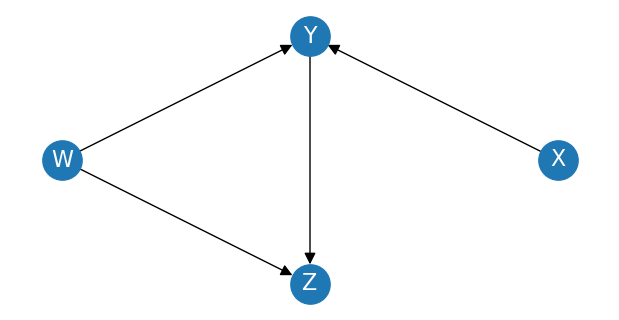

In [8]:
# Encode the graph
graph = nx.DiGraph(
    [
        ('X', 'Y'),
        ('W', 'Y'),
        ('Y', 'Z'),
        ('W', 'Z')
    ]
)

# Plot the graph
plt.figure(figsize=(6, 3))
nx.draw(
    G=graph,
    node_size=800,
    arrowsize=17,
    with_labels=True,
    font_color='white',
    font_size=16,
    pos=nx.circular_layout(graph)
)

## Model

In [10]:
# Model the system
causal_model = gcm.StructuralCausalModel(graph=graph)

# Assign mechanisms
gcm.auto.assign_causal_mechanisms(causal_model, data)

# Fit the model to the data
gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.40it/s]


In [20]:
# Generate the anomaly
anomaly = pd.DataFrame(
    dict(X=[0.3], Y=[300.99], Z=[901.23], W=[1.2])
)

In [21]:
# Which node caused an anomaly in Z?
anomaly_attribution = gcm.attribute_anomalies(causal_model, 'Z', anomaly)

Evaluate set function: 16it [00:00, 32.70it/s]


In [22]:
anomaly_attribution

{'X': array([-0.09155102]),
 'W': array([-0.09155102]),
 'Y': array([9.11888934]),
 'Z': array([0.27465307])}

`Y` is most likely the root cause on anomaly in `Z`.